# Ayiti Analytics Data Processing Bootcamp
  Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project


#Retrieve Dataset

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re as re
import seaborn as sns
import datetime as dt

In [ ]:
!pip install seaborn

In [ ]:
# WRITE CODES TO READ FILES
commune = pd.read_excel(r'commune.xlsx')
enroll = pd.read_csv(r'enroll.csv')
industry = pd.read_csv(r'industry.csv')
ord = pd.read_csv(r'ord.csv')
quest = pd.read_csv(r'quest.csv')
study_domain = pd.read_csv(r'study_domain.csv')
technology = pd.read_csv(r'technology.csv')
transaction = pd.read_csv(r'transaction.csv')

#Data Processing

In [ ]:
commune.head(1)

In [ ]:
enroll.head(1)

In [ ]:
industry.head(1)

In [ ]:
ord.head(1)

In [ ]:
quest

In [ ]:
study_domain.head(1)

In [ ]:
technology.head(1)

In [ ]:
transaction.head(1)

#Data Cleaning

In [ ]:
# REVOVE DUPLICATES
industry =  pd.get_dummies(data = industry[['key','quest_id','values']], columns=['values'],prefix='', prefix_sep='')

In [ ]:
industry.quest_id.nunique()

246

In [ ]:
industry= industry.groupby('quest_id').sum()

In [ ]:
study_domain= pd.get_dummies(data=study_domain[['key','quest_id','values']], columns=['values'], prefix = '', prefix_sep='')


In [ ]:
study_domain.quest_id.nunique()


244

In [ ]:
study_domain= study_domain.groupby('quest_id').sum()

In [ ]:
technology = pd.get_dummies(data= technology[['quest_id','values']], columns=['values'], prefix='', prefix_sep='',)


In [ ]:
technology.quest_id.nunique()

244

In [ ]:
technology = technology.groupby('quest_id').sum()


In [ ]:
# MERGE FILES
df=pd.merge(left=quest[['gender',	'dob',	'commune','created_at','department','have_computer_home','internet_at_home','hear_AA_1','quest_id','education_level','study_domain','university']], right=enroll[['quest_id','percentage_completed','started_at']], how = 'left',on='quest_id')
df1=pd.merge(left=df, right=study_domain, how = 'left',on='quest_id')
df2=pd.merge(left=df1, right=technology, how = 'left',on='quest_id')
df3=pd.merge(left=df2, right=industry, how = 'left',on='quest_id')
df3.shape

(250, 49)

In [ ]:
commune.rename(columns = {"Commune_Id": "commune"}, inplace = True)

In [ ]:
commune["commune"] = commune["commune"].str.lower()

In [ ]:
df4=pd.merge(left=df3, right=commune[["Commune_FR","Departement", "commune"]], how = 'left',on='commune')
df4.head(2)

In [ ]:
df4["created_at"] = df4["created_at"].str[:10]

In [ ]:
dff = pd.merge(left=ord, right=transaction, how = 'left',on='user_id')

In [ ]:
df5 = pd.merge(left=df4, right=dff, how = 'left',on='quest_id')

In [ ]:
#CHANGE DATE FORMAT
df5["dob"].replace({"3 aout 1977": "3/08/1977"}, inplace=True)
df5["dob"] = pd.to_datetime(df5["dob"])
df5.head(2)

In [ ]:
df5["created_at"] = pd.to_datetime(df5["created_at"])

In [ ]:
df5["age"]=((df5["created_at"]-df5["dob"])//365)

In [ ]:
df5["age"] = df5["age"].apply(lambda x: str(x)[:2])

In [ ]:
#df5['age'] = (df5['age']) //365

In [ ]:
df5.head(2)

In [ ]:
df5.columns

Index(['gender', 'dob', 'Inscription_date', 'have_computer_home',
       'internet_at_home', 'Means_of_communication', 'quest_id',
       'education_level', 'university', 'percentage_completed', 'started_at',
       'Accounting', 'Computer Science', 'Economics', 'Electrical Engineering',
       'Law', 'Management', 'Medicine', 'Statistics', 'other_x', 'Bash',
       'Excel', 'Git', 'Java', 'JavaScript', 'PHP', 'PowerBI or Tableau',
       'Python', 'R', 'SQL', 'VBA', 'other_y', 'Communications', 'Consulting',
       'Education', 'Energy', 'Finance', 'Healthcare', 'Insurance',
       'Manufacturing', 'Marketing', 'Commune_FR', 'Departement',
       'created_at_x', 'amount_dollars', 'created_at_y', 'transaction_id',
       'age', 'male', 'female'],
      dtype='object')

In [ ]:
df5.shape

(250, 69)

In [ ]:
df5.head(3)

In [ ]:
#DROP UNECESARRY COLUMNS, RENAME SOME AND REMOVE NAN COLUMNS
df5.drop(['commune','Unnamed: 0_x','department','other','Unnamed: 0_y','user_id','product_name','other','modified_at','coupon_code','coupon_id','subscription','affiliate_referral_code','status','course_id','product_id','Transportation','Retail/ E-Commerce','Public Sector/ Non-Profit Agencies','Technology (Software/ Internet)','amount_cents','study_domain'], axis=1, inplace=True)

In [ ]:
df5.rename(columns={'created_at':'Inscription_date','hear_AA_1':'Means_of_communication'}, inplace=True)

In [ ]:
df5

In [ ]:
#df5.created_at_x = df5['created_at_x'].fillna(value =df5.created_at_x.mean())

In [ ]:
df5.amount_dollars=df5["amount_dollars"].fillna(value =df5.amount_dollars.mean())

In [ ]:
df5.amount_dollars

In [ ]:
df5[df5.amount_dollars.isna()]

In [ ]:
df5.transaction_id=df5['transaction_id'].fillna(value =df5.transaction_id.mean())

In [ ]:
df5[df5.transaction_id.isna()]

In [ ]:
df5.dob = df5['dob'].fillna(value =df5.dob.mean())

In [ ]:
df5[df5.dob.isna()]

In [ ]:
df5.head(1)

In [ ]:
df5.shape

(250, 48)

#Data Visualization

In [ ]:
df5.describe()

In [ ]:
#GENERATE A FUNCTION FOR THE GRAPHS AND CREATED PIVOT TABLE

In [ ]:
def generate_barchart(data=df, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(i,
           tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='yellow',fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
           tot+10,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

In [ ]:
def prob_category(data,top_n =6,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,20)):
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     df = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data= df, title= title, abs_value =abs_value, rel_value=rel_value, figsize = figsize)
     return df

In [ ]:
pvtable1= pd.pivot_table(data=df5, values ='quest_id', index='Commune_FR', columns='gender', aggfunc='count',fill_value=0)

In [ ]:
pvtable1

In [ ]:
pvtable2= pd.pivot_table(df5, values='quest_id', index='Commune_FR', columns='education_level', aggfunc='count',fill_value=0)

In [ ]:
pvtable2

In [ ]:
pvtable3= pd.pivot_table(df5, values='quest_id', index='Commune_FR', columns='internet_at_home', aggfunc='count',fill_value=0)

In [ ]:
pvtable3

In [ ]:
pvtable4= pd.pivot_table(df5, values='quest_id', index='Commune_FR', columns='Means_of_communication', aggfunc='count',fill_value=0)

In [ ]:
pvtable4

In [ ]:
pvtable5= pd.pivot_table(df5, values='quest_id', index='gender', columns='Means_of_communication', aggfunc='count',fill_value=0)

In [ ]:
pvtable6= pd.pivot_table(df5, values='quest_id', index='gender', columns='education_level', aggfunc='count',fill_value=0)

In [ ]:
pvtable6

In [ ]:
pvtable7= pd.pivot_table(data=df5, index='Commune_FR', columns='internet_at_home', values='quest_id', aggfunc='count',fill_value=0)

In [ ]:
pvtable7

In [ ]:
pvtable8= pd.pivot_table(data=df5, index='Commune_FR', columns='have_computer_home', values='quest_id', aggfunc='count',fill_value=0)

In [ ]:
pvtable8

In [ ]:
df5.describe()

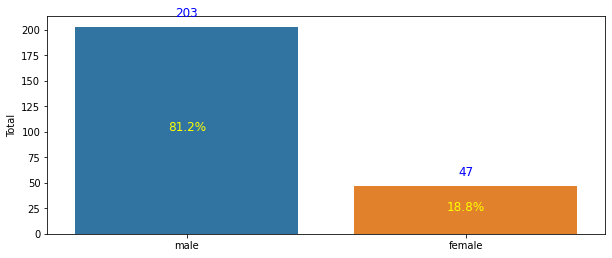

,Total,Percent
male,203,0.812
female,47,0.188


In [ ]:
#Make a matplotlib to show total and percent
prob_category(data=df5 ,col="gender", show_plot=True, figsize=(10,4))

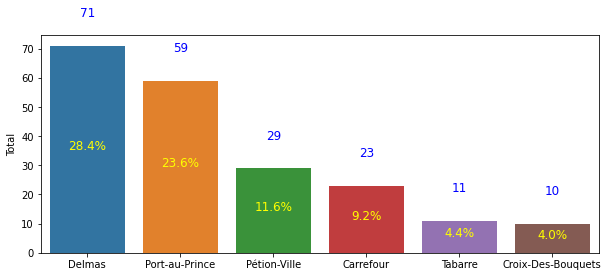

,Total,Percent
Delmas,71,0.284
Port-au-Prince,59,0.236
Pétion-Ville,29,0.116
Carrefour,23,0.092
Tabarre,11,0.044
Croix-Des-Bouquets,10,0.040


In [ ]:
prob_category(data= df5, col='Commune_FR', show_plot=True, figsize=(10,4))

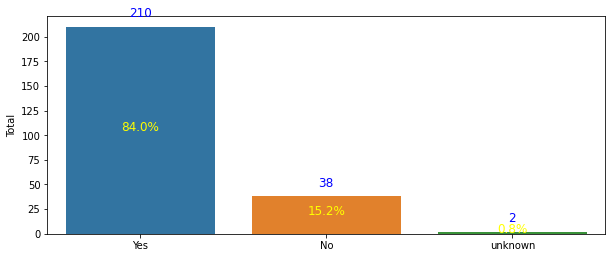

,Total,Percent
Yes,210,0.840
No,38,0.152
unknown,2,0.008


In [ ]:
prob_category(data=df5, col='internet_at_home', show_plot=True, figsize= (10,4))

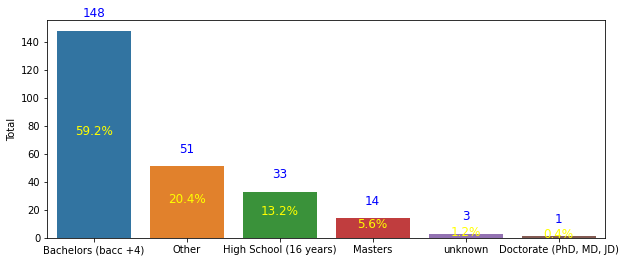

,Total,Percent
Bachelors (bacc +4),148,0.592
Other,51,0.204
High School (16 years),33,0.132
Masters,14,0.056
unknown,3,0.012
"Doctorate (PhD, MD, JD)",1,0.004


In [ ]:
prob_category(data=df5, col='education_level', show_plot=True, figsize= (10,4))

.

.

##1.Let's see the most effective communication channels that will allow a student to be susceptible to selection.


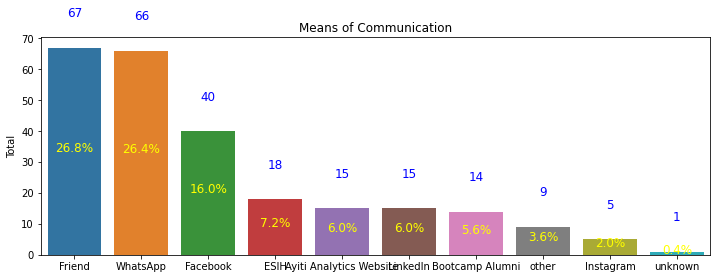

,Total,Percent
Friend,67,0.268
WhatsApp,66,0.264
Facebook,40,0.160
ESIH,18,0.072
Ayiti Analytics Website,15,0.060
LinkedIn,15,0.060
Bootcamp Alumni,14,0.056
other,9,0.036
Instagram,5,0.020
unknown,1,0.004


In [ ]:
#Make a matplotlib figure to show the most communication channels to be susceptible to selection
prob_category(data=df5,top_n=10, col='Means_of_communication', show_plot=True, figsize= (12,4), title='Means of Communication')

The percentage of communication channels most likely for a candidate to be selected are Friend, WhatsApp and Facebook

.

##2.Let's see the average number of university students who should participate in this program.

In [ ]:
university_percent =df5.university.value_counts(normalize=True).to_frame()
university_percent
university_total = df5.university.value_counts(normalize=False).to_frame()
university_total
university_total.rename(columns={'university':'Total'},inplace=True)
university_total.rename(columns={'university': 'Total'},inplace=True)
university_percent.rename(columns={'university': 'Percent'}, inplace=True)
university_per_tot= pd.concat([university_total ,university_percent], axis=1)
university_per_tot

,Total,Percent
unknown,95,0.380
other,55,0.220
Université d'Etat d'Haïti (UEH),39,0.156
Ecole Supérieure d'Infotronique d'Haïti (ESIH),27,0.108
Centre de Techniques de Planification et d'Economie Appliquée (CTPEA),16,0.064
Université INUKA,14,0.056
Quisqueya University,4,0.016


In [ ]:
df5.university.value_counts()

unknown                                                                  95
other                                                                    55
Université d'Etat d'Haïti (UEH)                                          39
Ecole Supérieure d'Infotronique d'Haïti (ESIH)                           27
Centre de Techniques de Planification et d'Economie Appliquée (CTPEA)    16
Université INUKA                                                         14
Quisqueya University                                                      4
Name: university, dtype: int64

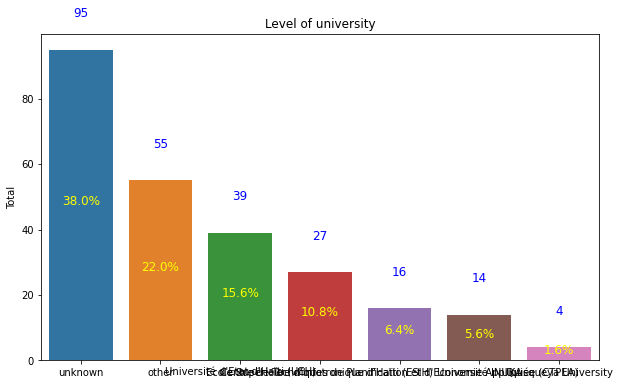

In [ ]:
generate_barchart(data=university_per_tot, title='Level of university',abs_value='Total', rel_value='Percent')

In [ ]:
df5.education_level.value_counts()

Bachelors (bacc +4)        148
Other                       51
High School (16 years)      33
Masters                     14
unknown                      3
Doctorate (PhD, MD, JD)      1
Name: education_level, dtype: int64

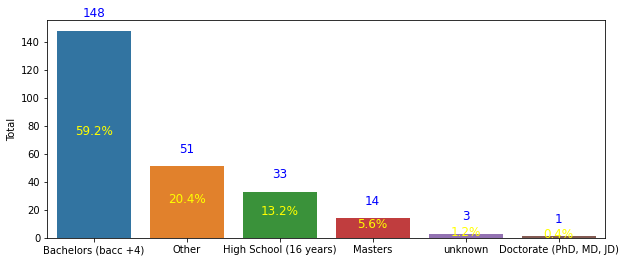

,Total,Percent
Bachelors (bacc +4),148,0.592
Other,51,0.204
High School (16 years),33,0.132
Masters,14,0.056
unknown,3,0.012
"Doctorate (PhD, MD, JD)",1,0.004


In [ ]:
prob_category(data=df5, col='education_level', show_plot=True, figsize= (10,4))

.

##3.Let's know what will be the average number of applications per week that we could have.

In [ ]:
df5['Inscription_date'] = pd.to_datetime(df5['Inscription_date'])

In [ ]:
df5['male']= df5['gender'].apply(lambda x: 1 if x == 'male' else 0)

In [ ]:
df5['female'] = df5['gender'].apply(lambda x: 1 if x == 'female' else 0)

In [ ]:
registration_date= df5[['Inscription_date','quest_id','male','female']].groupby(pd.Grouper(key='Inscription_date', freq='7D')).sum()
registration_date.head()

,male,female
Inscription_date,,
2021-02-14,108,28
2021-02-21,41,13
2021-02-28,26,3
2021-03-07,26,3
2021-03-14,2,0


In [ ]:
#Show percent 
Prcent_regist= registration_date/df5.shape[0]
Prcent_regist

,male,female
Inscription_date,,
2021-02-14,0.432,0.112
2021-02-21,0.164,0.052
2021-02-28,0.104,0.012
2021-03-07,0.104,0.012
2021-03-14,0.008,0.000


In [ ]:
registration_data =df5[["Inscription_date","quest_id", "female","male"]].groupby(pd.Grouper(key="Inscription_date",freq='7D')).sum()
registration_data
registration_data['sum']=registration_data['male']+registration_data['female']
registration_data.head()
registration_data['frequencies']=registration_data['sum']/df5.shape[0]
registration_data

,female,male,sum,frequencies
Inscription_date,,,,
2021-02-14,28,108,136,0.544
2021-02-21,13,41,54,0.216
2021-02-28,3,26,29,0.116
2021-03-07,3,26,29,0.116
2021-03-14,0,2,2,0.008


In [ ]:
registration_data_mean=(registration_data['sum'].sum())/registration_data.shape[0]
registration_data_mean

50.0

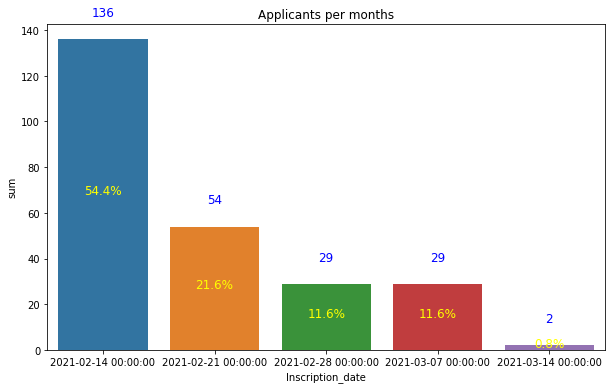

In [ ]:
generate_barchart(data=registration_data,title="Applicants per months",abs_value="sum",rel_value="frequencies")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


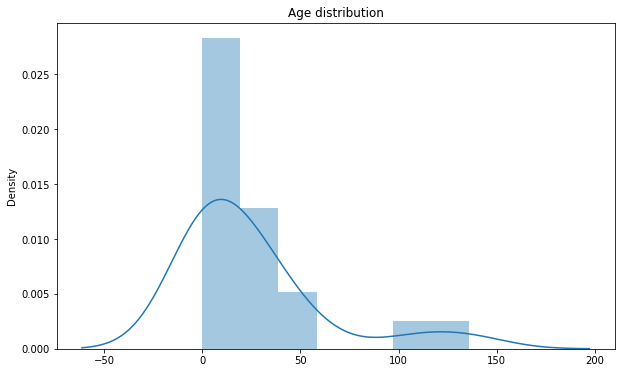

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(x=registration_data ,kde=True)
plt.title("Age distribution")
plt.show()

Based on the calculate and figure the average number of applications is 50%

.

##4.Let's see if were to do all the bootcamp online, who 
would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time.

In [ ]:
#Find the total and the percent of participants with internet access
int_home=pvtable7["Yes"].to_frame()
int_home_percent= int_home/df5.shape[0]
int_home1=int_home.sort_values(by="Yes", ascending=False)
int_home_percent1=int_home_percent.sort_values(by="Yes",ascending=False)
int_home1.rename(columns={"Yes": "Total Internet"},inplace=True)
int_home_percent1.rename(columns={"Yes": "Total Percent Internet"},inplace=True)
int_df= pd.concat([int_home1,int_home_percent1], axis=1)
int_df.head(4)

,Total Internet,Total Percent Internet
Commune_FR,,
Delmas,61,0.244
Port-au-Prince,52,0.208
Pétion-Ville,25,0.100
Carrefour,18,0.072


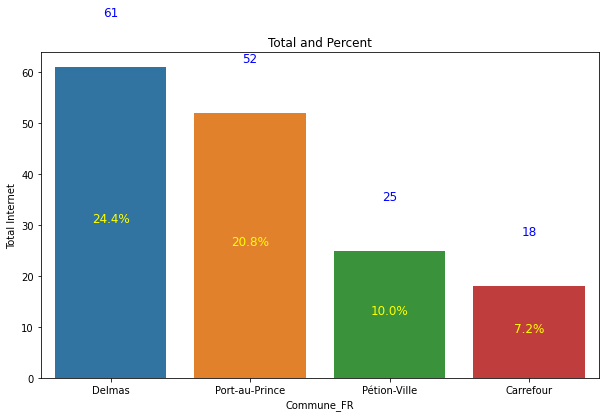

In [ ]:
generate_barchart(data=int_df.iloc[:4,:],title="Total and Percent",abs_value="Total Internet",rel_value="Total Percent Internet")

In [ ]:
comp_home=pvtable8['Yes'].to_frame()
Percent_Computer= comp_home/df5.shape[0]
comp_home1=int_home.sort_values(by="Yes", ascending=False)
Percent_Computer1=Percent_Computer.sort_values(by="Yes",ascending=False)
comp_home1.rename(columns={"Yes":"Total Computer"},inplace= True)
Percent_Computer1.rename(columns={"Yes": "Percent Computer"}, inplace=True)
Tot_comp_df= pd.concat([comp_home1,Percent_Computer1],axis=1)
Tot_comp_df.head(4)



,Total Computer,Percent Computer
Delmas,61,0.264
Port-au-Prince,52,0.228
Pétion-Ville,25,0.100
Carrefour,18,0.084


In [ ]:
total_comp_int= pd.merge(left=int_home,right=comp_home, how="left", on="Commune_FR")
total_comp_int

,Yes_x,Yes_y
Commune_FR,,
Aquin,1,1
Cap-Haïtien,3,5
Caracol,1,1
Carrefour,18,21
Cité Soleil,3,3
Cornillon / Grand Bois,1,1
Croix-Des-Bouquets,8,10
Delmas,61,66
Dondon,0,1


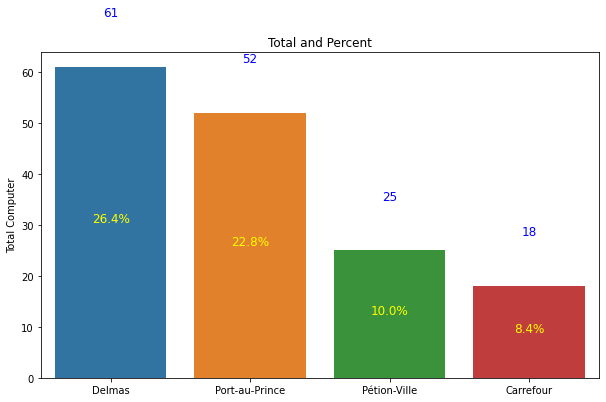

In [ ]:
generate_barchart(data=Tot_comp_df.iloc[:4,:],title="Total and Percent",abs_value="Total Computer",rel_value="Percent Computer")

.

##5.Let's see the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection


Text(0, 0.5, 'Means_of_communication')

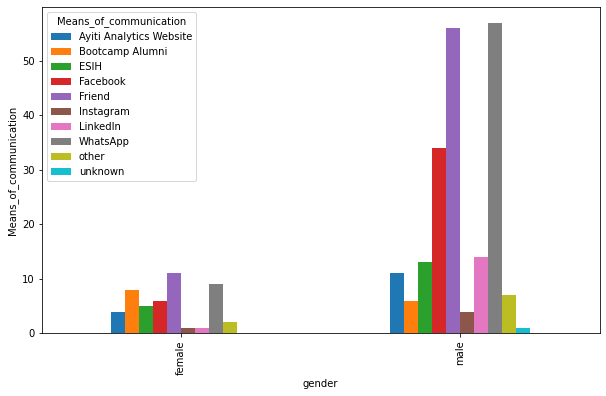

In [ ]:
# Make a matplotlib figure to show the most communication channels to susceptible the women
ax = pvtable5.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(10, 6)
ax.set_xlabel("gender")
ax.set_ylabel("Means_of_communication")

The easiest communication channels to reach a lot more women is through friends.

.

##6.Let's see which three communes of the country will be the most likely to expand its training centers.


In [ ]:
#How many applicants
total_enscript_by_commune= df5.Commune_FR.value_counts(normalize=False).to_frame()
total_enscript_by_commune.rename(columns={"Commune_FR": "Total"},inplace=True)

#How many applicants by "commune" and "Amount_Payed"
Total_Pay_By_Commune =df5.groupby(by=["Commune_FR"]).amount_dollars.sum().to_frame()
Total_Pay_By_Commune.rename(columns={"amount_dollars": "Total Pay"},inplace=True)
Total_Pay_By_Commune.sort_values(by=['Total Pay'],  ascending=False, inplace=True)

#Percent pay by commune
Percent_pay_by_Commune = Total_Pay_By_Commune =df5.groupby(by=["Commune_FR"]).amount_dollars.sum().to_frame()/df5.shape[0]
Percent_pay_by_Commune.rename(columns={"amount_dollars": "Percent_Pay"},inplace=True)
Percent_pay_by_Commune.sort_values(by=['Percent_Pay'],  ascending=False, inplace=True)

Commune= pd.concat([Percent_pay_by_Commune,total_enscript_by_commune],axis=1)
Commune

,Percent_Pay,Total
Delmas,4.468571,71
Port-au-Prince,3.634286,59
Pétion-Ville,1.822857,29
Carrefour,1.445714,23
Tabarre,0.691429,11
Croix-Des-Bouquets,0.645714,10
Cap-Haïtien,0.314286,5
Saint-Marc,0.251429,4
Jacmel,0.205714,3
Verrettes,0.205714,3


In [ ]:
commune_total = df5.Commune_FR.value_counts(normalize=False).to_frame()
commune_total1= commune_total.sort_values(by="Commune_FR",ascending=False)
commune_total1["frequence"]=  commune_total1/df5.shape[0]  
total_commune2 =commune_total1.loc[["Delmas","Pétion-Ville","Carrefour"]]
total_commune2

,Commune_FR,frequence
Delmas,71,0.284
Pétion-Ville,29,0.116
Carrefour,23,0.092


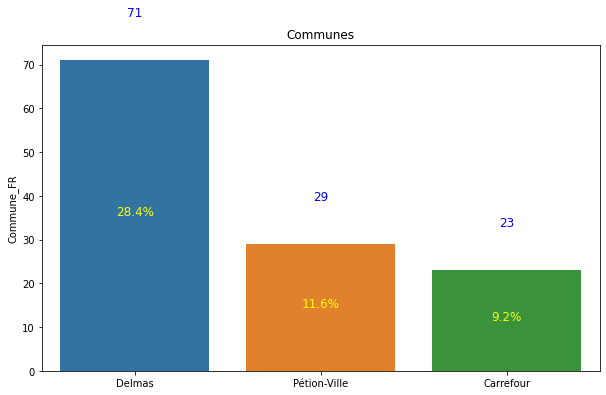

In [ ]:
generate_barchart(data=total_commune2,title="Communes",abs_value='Commune_FR',rel_value="frequence")

In [ ]:
#prob_category(data= df5, col='Commune_FR', show_plot=True, figsize=(10,4), title='Most likely Communes')

This presentation suggests the three most likely communes are: Delmas, Petion-Ville and Carrefour.

.